This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. <br>

We will use various machine learning techniques like Logistic Regression, K-means Classifier, Decission Tree Classifier, RandomForest Classifier and SVM Classifier to classify weather the person is having a heart disease or not based upon those 14 variables, before that we use some basic Exploratory data analysis to get few insights from the data 

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Importing Packages

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

## Read Data

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
no_count = len(df[df.target == 0])
yes_count = len(df[df.target == 1])
print("Percentage of Patients with no Heart Disease: {:.2f}%".format((no_count / (len(df.target))*100)))
print("Percentage of Patients with Heart Disease: {:.2f}%".format((yes_count / (len(df.target))*100)))

Percentage of Patients with no Heart Disease: 45.54%
Percentage of Patients with Heart Disease: 54.46%


This is balanced data

In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


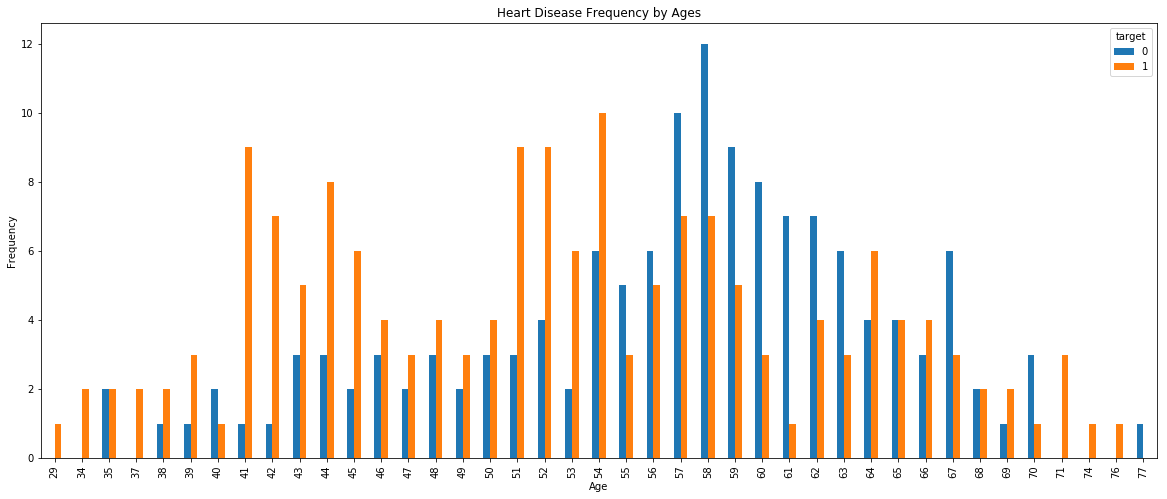

In [9]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,8))
plt.title('Heart Disease Frequency by Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

It can be observed that the highest frequency of heart disease is for females with age around 58

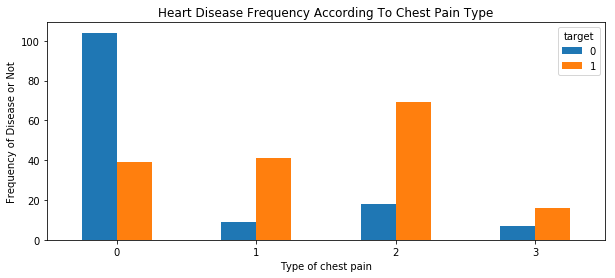

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,4))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Type of chest pain')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

It can be observed that most common type of chest pain does not lead to heart disease

### Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [12]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [13]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


## Creating Model for Logistic Regression
<br>
Since the data is balanced, hence we can use accuracy as metric to decide the best model.

In [14]:
y = df.target.values
x_unnorm = df.drop(['target'], axis = 1)

In [117]:
x = (x_unnorm - np.min(x_unnorm)) / (np.max(x_unnorm) - np.min(x_unnorm)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=12)

In [100]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\chund\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
print("test accuracy {}".format(lr.score(x_test,y_test)))

lr_score=lr.score(x_test,y_test)

test accuracy 0.819672131147541


In [102]:
y_prediction = lr.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

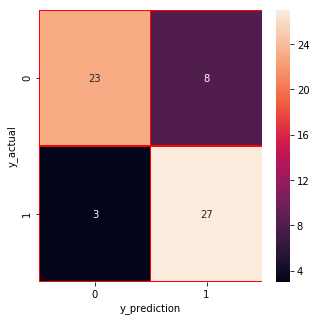

In [103]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## Creating Model for KNN Classifier

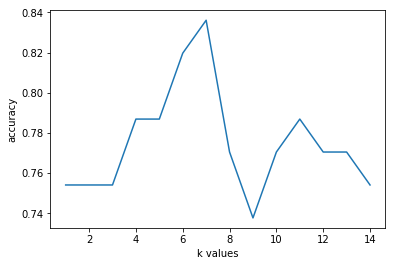

In [104]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

we can observe that we get highest frequency using k=7

In [105]:
k = 7
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {}".format(k,knn.score(x_test,y_test)))

knn_score = knn.score(x_test,y_test)

 7 nn score: 0.8360655737704918


In [106]:
y_prediction = knn.predict(x_test)
y_actual=y_test
cm = confusion_matrix(y_actual,y_prediction)

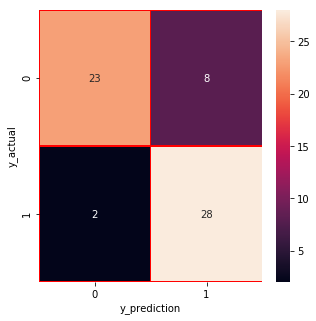

In [107]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## Creating Model for DecisionTree Classifier Regression

In [108]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

dt_score=dt.score(x_test,y_test)

score:  0.6557377049180327


In [109]:
from sklearn.metrics import confusion_matrix
y_prediction = dt.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

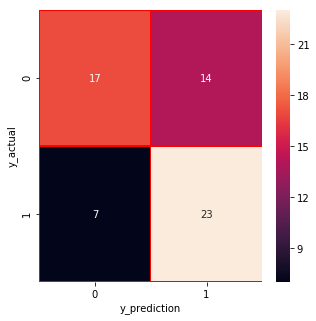

In [110]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## RandomForest Classifier

In [111]:
# n_estimators = 100 means this model will use 100 subsets.
rf = RandomForestClassifier(n_estimators = 100,random_state = 42)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

rf_score = rf.score(x_test,y_test)

random forest algo result:  0.8032786885245902


In [112]:
y_prediction = rf.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

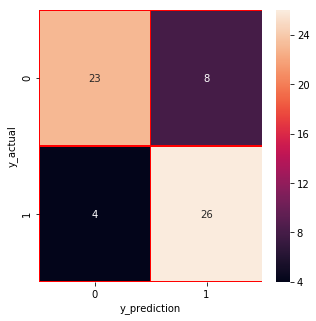

In [113]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## SVM Classifier

In [114]:
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(x_train,y_train)
# prediction and accuracy 
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

svm_score = svm.score(x_test,y_test)

print accuracy of svm algo:  0.6885245901639344


C:\Users\chund\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [115]:
y_prediction = svm.predict(x_test)
y_actual = y_test
cm = confusion_matrix(y_actual,y_prediction)

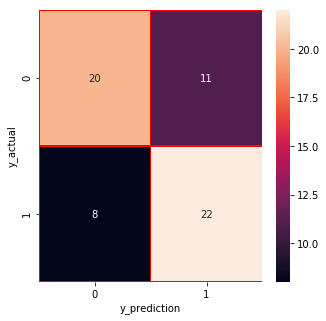

In [116]:
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

## out of all the models the K-Nearest model with k=7 gives the best result.